# python imports

In [24]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler

# Reading Data

In [25]:
data = pd.read_csv('./data/all_and_classification.csv')  # load data set
data = data.drop('file_name', axis=1)
data = data.drop('run', axis=1)
data['forks'] = data['forks'].replace(['steady state'], 1)
data['forks'] = data['forks'].replace(['no steady state'], 0)
data = data.loc[data['forks'] == 1]
data = data.drop('forks', axis=1)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,steady_state_starts
0,0.188482,0.075366,0.073728,0.072942,0.072614,0.075170,0.107217,0.087884,0.077857,0.076677,...,0.075956,0.076481,0.076284,0.076349,0.076349,0.098763,0.076612,0.076153,0.076874,1765
1,0.188219,0.075891,0.073269,0.073335,0.073138,0.074449,0.104530,0.079888,0.071762,0.072090,...,0.073925,0.073138,0.073204,0.073859,0.073204,0.073466,0.073269,0.073400,0.073597,480
2,0.190317,0.075170,0.072417,0.072221,0.073073,0.073531,0.113967,0.096076,0.088605,0.087949,...,0.068289,0.076218,0.074908,0.074908,0.074842,0.073925,0.075497,0.073925,0.074514,421
3,0.190579,0.067994,0.073597,0.073400,0.073335,0.075235,0.106168,0.085983,0.078447,0.077464,...,0.074383,0.074383,0.074973,0.074121,0.074842,0.083755,0.074646,0.074580,0.074711,1477
4,0.185860,0.074908,0.072155,0.072942,0.072810,0.074252,0.104530,0.095683,0.087753,0.085721,...,0.066322,0.072745,0.076349,0.072745,0.072614,0.074056,0.072417,0.071959,0.073925,385


# Standardizing the data

In [26]:
sc = StandardScaler()
sc.fit(data)
data_std = pd.DataFrame(sc.transform(data))
data_std.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
0,-0.126914,-0.156469,-0.147680,-0.150102,-0.149242,-0.145734,-0.126131,-0.135464,-0.144549,-0.144901,...,-0.136129,-0.140318,-0.141278,-0.140529,-0.140895,-0.124539,-0.140775,-0.140998,-0.139304,2.059208
1,-0.127070,-0.156103,-0.147973,-0.149828,-0.148880,-0.146243,-0.128000,-0.140895,-0.148788,-0.148130,...,-0.137476,-0.142733,-0.143589,-0.142317,-0.143153,-0.142908,-0.143238,-0.143023,-0.141613,0.137295
2,-0.125822,-0.156606,-0.148517,-0.150602,-0.148925,-0.146891,-0.121437,-0.129901,-0.137073,-0.136965,...,-0.141214,-0.140507,-0.142311,-0.141564,-0.141977,-0.142574,-0.141596,-0.142637,-0.140967,0.049051
3,-0.125666,-0.161617,-0.147764,-0.149783,-0.148744,-0.145688,-0.126860,-0.136755,-0.144138,-0.144347,...,-0.137172,-0.141833,-0.142261,-0.142129,-0.141977,-0.135436,-0.142224,-0.142155,-0.140828,1.628460
4,-0.128473,-0.156789,-0.148684,-0.150102,-0.149106,-0.146382,-0.128000,-0.130168,-0.137666,-0.138533,...,-0.142517,-0.143017,-0.141229,-0.143117,-0.143577,-0.142479,-0.143866,-0.144084,-0.141382,-0.004792


In [27]:
x_data = data_std.drop(3000, axis=1)
y_data = data_std[3000]

# Splitting the data

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,
                                                    random_state=1)

# Linear regression

In [29]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [30]:
# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred))

Coefficients:  [-2.29510940e+00 -1.90553400e+04 -1.85071863e+01 ... -9.29724501e+05
  2.17003382e+06  3.98795627e+05]
Variance score: -1889292604634.3167
Mean squared error: 1779917738252.65
Coefficient of determination: -1889292604634.32


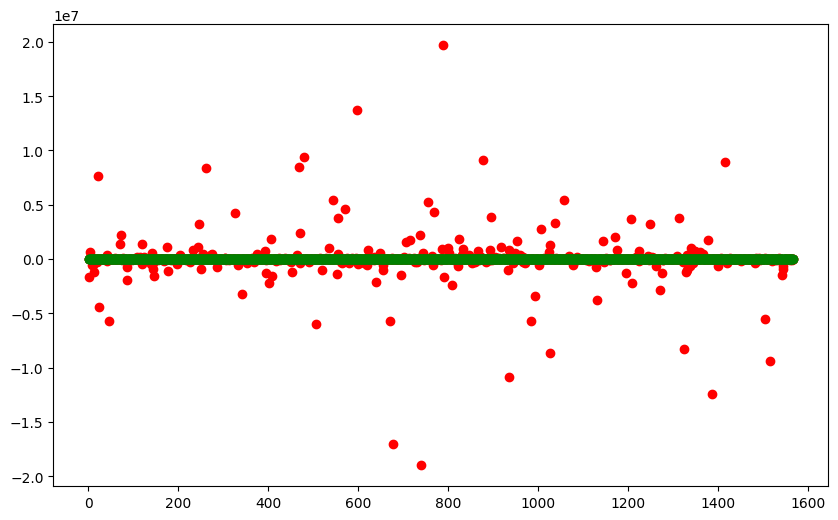

In [43]:
plt.figure(figsize=(10,6))
plt.scatter([range(1, 1567)],y_pred, color ='r')
plt.scatter([range(1, 1567)],y_test, color ='g')

plt.show()

# Decision Tree Regression

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
dtregr = DecisionTreeRegressor()
dtregr.fit(X_train, y_train)
y_pred_dtr = dtregr.predict(X_test)

In [103]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(dtregr.score(X_test, y_test)))
print("Mean squared error: %.2f" % metrics.mean_squared_error(y_test, y_pred_dtr))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred_dtr))

Variance score: -0.2219664737366982
Mean squared error: 1.15
Coefficient of determination: -0.22


In [56]:
mse = metrics.mean_squared_error(y_test, y_pred_dtr)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

MSE:  1.15122443014793
RMSE:  1.072951271096656


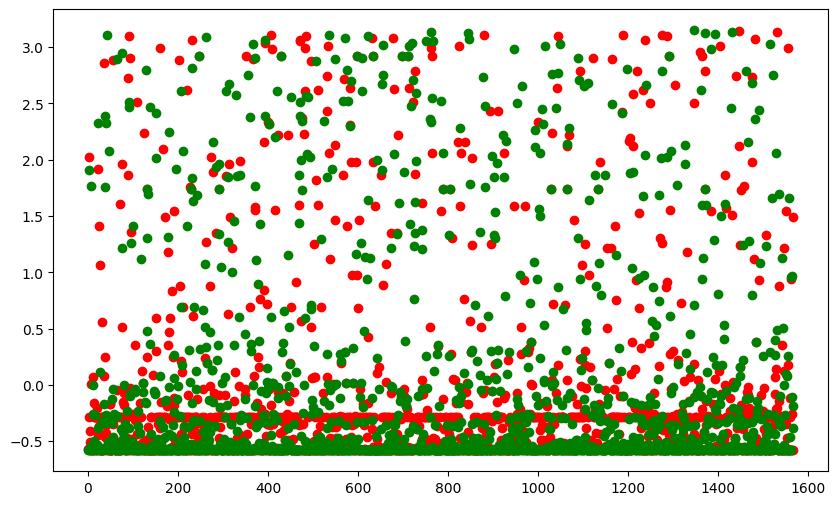

In [57]:
plt.figure(figsize=(10,6))
plt.scatter([range(1, 1567)],y_pred_dtr, color ='r')
plt.scatter([range(1, 1567)],y_test, color ='g')

plt.show()

#  Lasso Regression

In [64]:
from sklearn import linear_model

In [68]:
lassoReg = linear_model.Lasso()
lassoReg.fit(X_train, y_train)
y_pred_lasso_reg = lassoReg.predict(X_test)

In [104]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(lassoReg.score(X_test, y_test)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred_lasso_reg))
mse = metrics.mean_squared_error(y_test, y_pred_lasso_reg)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

Variance score: -0.0007929366842649443
Coefficient of determination: -0.00
MSE:  0.9428550643515214
RMSE:  0.9710072421725399


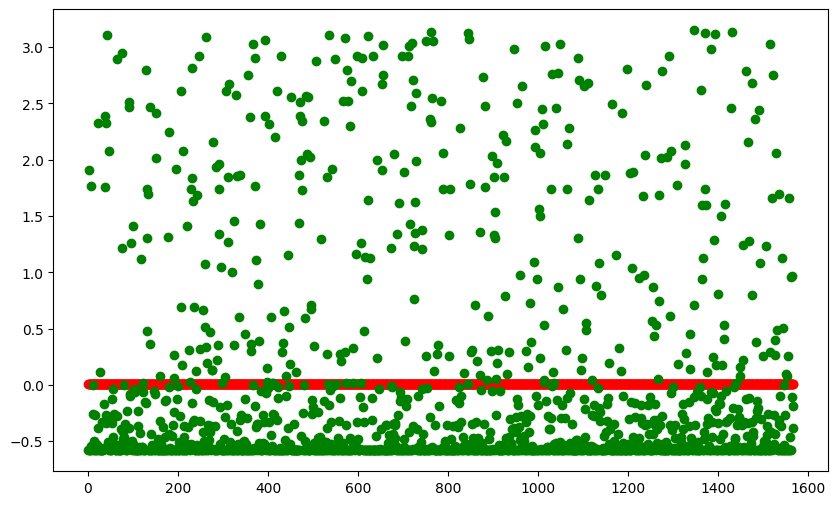

In [70]:
plt.figure(figsize=(10,6))
plt.scatter([range(1, 1567)],y_pred_lasso_reg, color ='r')
plt.scatter([range(1, 1567)],y_test, color ='g')

plt.show()

# Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
rfr = RandomForestRegressor(max_depth=2)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

In [105]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(rfr.score(X_test, y_test)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred_rfr))
mse = metrics.mean_squared_error(y_test, y_pred_rfr)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

Variance score: 0.07805191767731057
Coefficient of determination: 0.08
MSE:  0.8685746937494231
RMSE:  0.9319735477734457


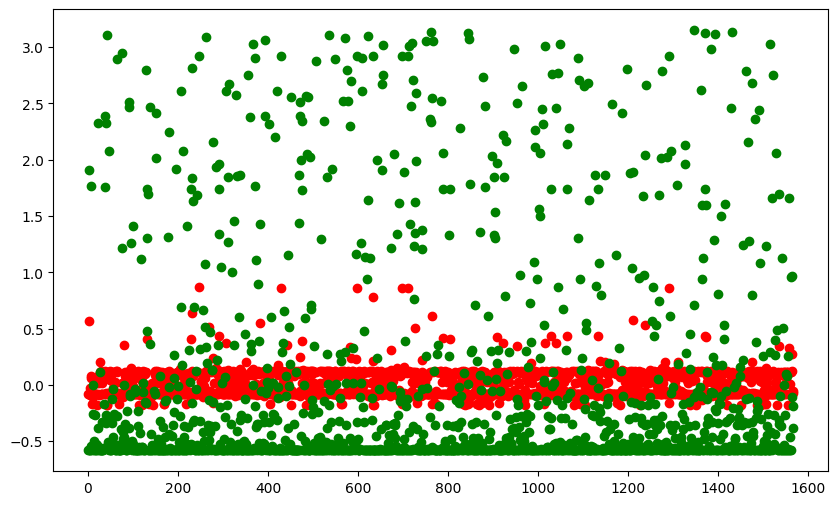

In [89]:
plt.figure(figsize=(10,6))
plt.scatter([range(1, 1567)],y_pred_rfr, color ='r')
plt.scatter([range(1, 1567)],y_test, color ='g')

plt.show()

# Ridge Regression

In [78]:
from sklearn.linear_model import Ridge

In [79]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [106]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(ridge.score(X_test, y_test)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred_ridge))
mse = metrics.mean_squared_error(y_test, y_pred_ridge)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

Variance score: -0.1699658877118828
Coefficient of determination: -0.17
MSE:  1.1022342603679727
RMSE:  1.049873449691901


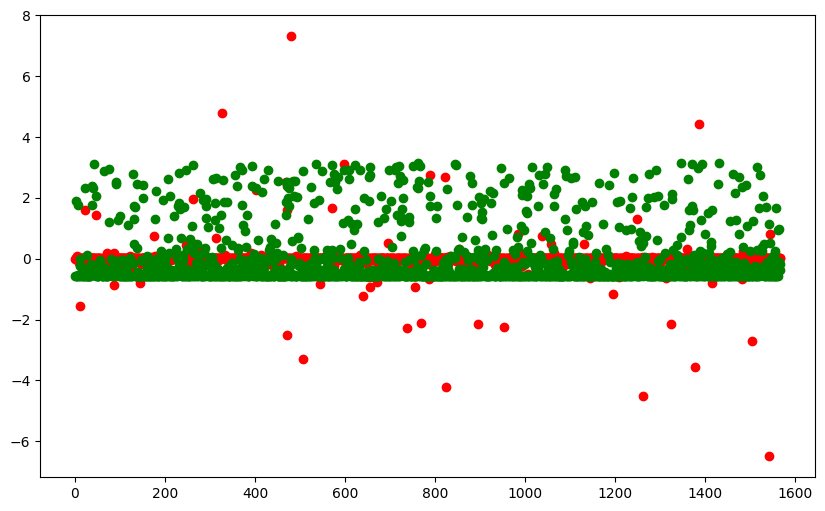

In [81]:
plt.figure(figsize=(10,6))
plt.scatter([range(1, 1567)],y_pred_ridge, color ='r')
plt.scatter([range(1, 1567)],y_test, color ='g')

plt.show()

# Neural Network Regression

In [82]:
from sklearn.neural_network import MLPRegressor

In [83]:
nnRegr = MLPRegressor(random_state=1, max_iter=500)
nnRegr.fit(X_train, y_train)
y_pred_nnRegr = nnRegr.predict(X_test)

In [107]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(nnRegr.score(X_test, y_test)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred_nnRegr))
mse = metrics.mean_squared_error(y_test, y_pred_nnRegr)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

Variance score: -0.0010780175637195022
Coefficient of determination: -0.00
MSE:  0.9431236413379198
RMSE:  0.971145530462824


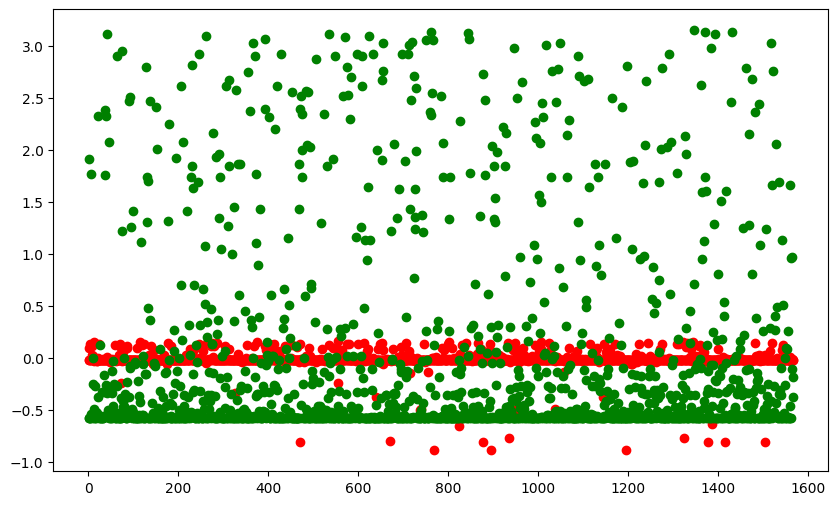

In [86]:
plt.figure(figsize=(10,6))
plt.scatter([range(1, 1567)],y_pred_nnRegr, color ='r')
plt.scatter([range(1, 1567)],y_test, color ='g')

plt.show()

# KNN Model

In [90]:
from sklearn.neighbors import KNeighborsRegressor

In [91]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)

In [108]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(knr.score(X_test, y_test)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred_knr))
mse = metrics.mean_squared_error(y_test, y_pred_knr)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

Variance score: -0.05853441897819778
Coefficient of determination: -0.06
MSE:  0.9972537786193998
RMSE:  0.9986259452965358


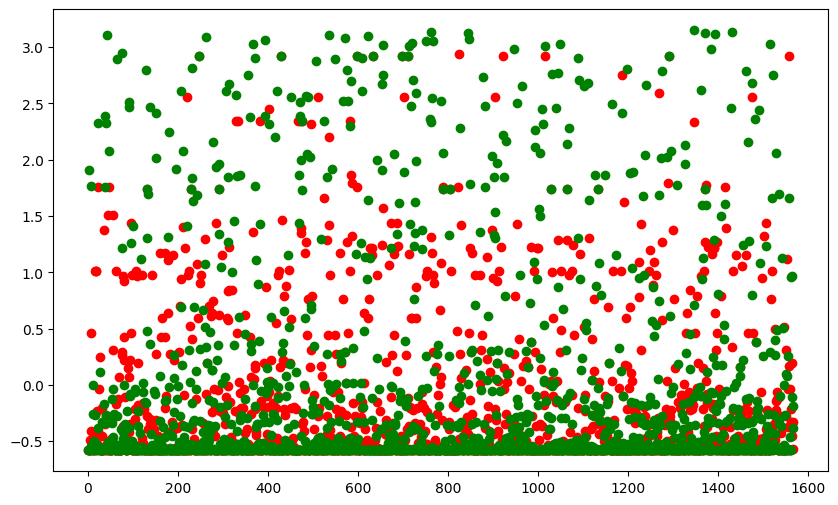

In [93]:
plt.figure(figsize=(10,6))
plt.scatter([range(1, 1567)],y_pred_knr, color ='r')
plt.scatter([range(1, 1567)],y_test, color ='g')

plt.show()

# Gausian Regression

In [94]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [95]:
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr.fit(X_train, y_train)
y_pred_gpr = gpr.predict(X_test)
gpr.score(X_train, y_train)

0.10414225081264283

In [109]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(lassoReg.score(X_test, y_test)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred_gpr))
mse = metrics.mean_squared_error(y_test, y_pred_gpr)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))

Variance score: -0.0007929366842649443
Coefficient of determination: -0.18
MSE:  1.112663332878848
RMSE:  1.0548285798549677


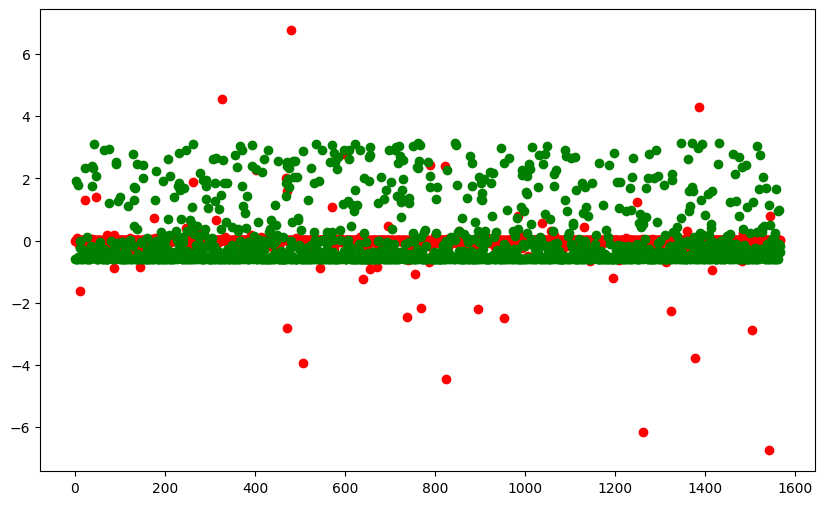

In [99]:
plt.figure(figsize=(10,6))
plt.scatter([range(1, 1567)],y_pred_gpr, color ='r')
plt.scatter([range(1, 1567)],y_test, color ='g')

plt.show()

# Polynomial Regression

In [100]:
from sklearn.preprocessing import PolynomialFeatures

In [101]:
poly = PolynomialFeatures(2)
poly.fit(X_train, y_train)
y_pred_poly = poly.predict(X_test)

AttributeError: 'PolynomialFeatures' object has no attribute 'predict'

In [102]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, y_pred_poly))
mse = metrics.mean_squared_error(y_test, y_pred_poly)
print("MSE: ", mse)
print("RMSE: ", mse ** (1 / 2.0))

NameError: name 'y_pred_poly' is not defined

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter([range(1, 1567)],y_pred_poly, color ='r')
plt.scatter([range(1, 1567)],y_test, color ='g')

plt.show()